In [1]:
# importing Libraries and reading the dataset

import numpy as np # linear algebra
import pandas as pd # data processing,
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("C:/Users/harul/Documents/ASSIGNMENT/PA PROJECT DATASET.csv")
df.head(10)


,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,3/22/2022 1:10,2h 50m,non-stop,3897.0
1,Air India,1/5/2019,Kolkata,Banglore,5:50,13:15,7h 25m,2 stops,7662.0
2,Jet Airways,9/6/2019,Delhi,Cochin,9:25,6/10/2022 4:25,19h,2 stops,13882.0
3,IndiGo,12/5/2019,NaN,Banglore,18:05,23:30,5h 25m,1 stop,6218.0
4,IndiGo,1/3/2019,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,13302.0
5,SpiceJet,24/06/2019,Kolkata,Banglore,9:00,11:25,2h 25m,non-stop,3873.0
6,Jet Airways,12/3/2019,Banglore,New Delhi,18:55,3/13/2022 10:25,15h 30m,1 stop,11087.0
7,Jet Airways,1/3/2019,Banglore,NaN,8:00,3/2/2022 5:05,21h 5m,1 stop,22270.0
8,Jet Airways,12/3/2019,Banglore,New Delhi,8:55,3/13/2022 10:25,25h 30m,1 stop,11087.0
9,Multiple carriers,27/05/2019,Delhi,Cochin,11:25,19:15,7h 50m,1 stop,8625.0


In [2]:
# information about the Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10683 non-null  object 
 1   Date_of_Journey  10683 non-null  object 
 2   Source           10662 non-null  object 
 3   Destination      10659 non-null  object 
 4   Dep_Time         10683 non-null  object 
 5   Arrival_Time     10683 non-null  object 
 6   Duration         10683 non-null  object 
 7   Total_Stops      10682 non-null  object 
 8   Price            10659 non-null  float64
dtypes: float64(1), object(8)
memory usage: 751.3+ KB


In [3]:
# summary on the  price attribute
df.describe()

,Price
count,10659.000000
mean,9084.209588
std,4610.081714
min,1759.000000
25%,5276.500000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [4]:
# printing the column and rows
df.shape

(10683, 9)

In [5]:
# displaying the Null Values
df.isnull().sum()

Airline             0
Date_of_Journey     0
Source             21
Destination        24
Dep_Time            0
Arrival_Time        0
Duration            0
Total_Stops         1
Price              24
dtype: int64

In [6]:
#drop the nullvalues
df.dropna(inplace=True)

In [7]:
# displaying the changed null values
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Price              0
dtype: int64

In [8]:
# displaying the datatypes
df.dtypes

Airline             object
Date_of_Journey     object
Source              object
Destination         object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Price              float64
dtype: object

In [9]:

def change_into_datetime(col):
    df[col]=pd.to_datetime(df[col])
df.columns    

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Dep_Time',
       'Arrival_Time', 'Duration', 'Total_Stops', 'Price'],
      dtype='object')

In [10]:
# changing the object attribute to datetime datatypes
for i in ['Date_of_Journey','Dep_Time', 'Arrival_Time']:
    change_into_datetime(i)
df.dtypes    

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Price                     float64
dtype: object

In [11]:
# Sepearting the  Date_of_Journey to Date and Month 
df['journey_date']=df['Date_of_Journey'].dt.day
df['journey_month']=df['Date_of_Journey'].dt.month
df.head(10)

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,journey_date,journey_month
0,IndiGo,2019-03-24,Banglore,New Delhi,2022-11-16 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,3897.0,24,3
1,Air India,2019-01-05,Kolkata,Banglore,2022-11-16 05:50:00,2022-11-16 13:15:00,7h 25m,2 stops,7662.0,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,2022-11-16 09:25:00,2022-06-10 04:25:00,19h,2 stops,13882.0,6,9
4,IndiGo,2019-01-03,Banglore,New Delhi,2022-11-16 16:50:00,2022-11-16 21:35:00,4h 45m,1 stop,13302.0,3,1
5,SpiceJet,2019-06-24,Kolkata,Banglore,2022-11-16 09:00:00,2022-11-16 11:25:00,2h 25m,non-stop,3873.0,24,6
6,Jet Airways,2019-12-03,Banglore,New Delhi,2022-11-16 18:55:00,2022-03-13 10:25:00,15h 30m,1 stop,11087.0,3,12
8,Jet Airways,2019-12-03,Banglore,New Delhi,2022-11-16 08:55:00,2022-03-13 10:25:00,25h 30m,1 stop,11087.0,3,12
9,Multiple carriers,2019-05-27,Delhi,Cochin,2022-11-16 11:25:00,2022-11-16 19:15:00,7h 50m,1 stop,8625.0,27,5
10,Air India,2019-01-06,Delhi,Cochin,2022-11-16 09:45:00,2022-11-16 23:00:00,13h 15m,1 stop,8907.0,6,1
11,IndiGo,2019-04-18,Kolkata,Banglore,2022-11-16 20:20:00,2022-11-16 22:55:00,2h 35m,non-stop,4174.0,18,4


In [12]:
# droping the Date_of_Journey Attribute
df.drop('Date_of_Journey', axis=1, inplace=True)

In [13]:
# function for extracting hour and minutes
def extract_hour(data,col):
    data[col+'_hour']=data[col].dt.hour
    
def extract_min(data,col):
    data[col+'_min']=data[col].dt.minute
    

def drop_col(data,col):
    data.drop(col,axis=1,inplace=True)

In [14]:
# extracting hours from Dep_Time
extract_hour(df,'Dep_Time')

#extracting minutes
extract_min(df,'Dep_Time')

#drop the column
drop_col(df,'Dep_Time')

In [15]:
# extracting hours from Arrival_Time
extract_hour(df,'Arrival_Time')

#extracting min
extract_min(df,'Arrival_Time')

#drop the column
drop_col(df,'Arrival_Time')

In [16]:
df.head(10)

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_date,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897.0,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662.0,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,19h,2 stops,13882.0,6,9,9,25,4,25
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,13302.0,3,1,16,50,21,35
5,SpiceJet,Kolkata,Banglore,2h 25m,non-stop,3873.0,24,6,9,0,11,25
6,Jet Airways,Banglore,New Delhi,15h 30m,1 stop,11087.0,3,12,18,55,10,25
8,Jet Airways,Banglore,New Delhi,25h 30m,1 stop,11087.0,3,12,8,55,10,25
9,Multiple carriers,Delhi,Cochin,7h 50m,1 stop,8625.0,27,5,11,25,19,15
10,Air India,Delhi,Cochin,13h 15m,1 stop,8907.0,6,1,9,45,23,0
11,IndiGo,Kolkata,Banglore,2h 35m,non-stop,4174.0,18,4,20,20,22,55


In [17]:
duration=list(df['Duration'])
for i in range(len(duration)):
    if len(duration[i].split(' '))==2:
        pass
    else:
        if 'h' in duration[i]: # Check if duration contains only hour
             duration[i]=duration[i] + ' 0m' # Adds 0 minute
        else:
             duration[i]='0h '+ duration[i]

In [18]:
df['Duration']=duration
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_date,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897.0,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662.0,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,19h 0m,2 stops,13882.0,6,9,9,25,4,25
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,13302.0,3,1,16,50,21,35
5,SpiceJet,Kolkata,Banglore,2h 25m,non-stop,3873.0,24,6,9,0,11,25


In [19]:
# spliting the Duration into Hours and Seconds
def hour(x):
    return x.split(' ')[0][0:-1]

def minutes(x):
    return x.split(' ')[1][0:-1]
df['dur_hour']=df['Duration'].apply(hour)
df['dur_min']=df['Duration'].apply(minutes)
df.head(10)

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_date,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,dur_hour,dur_min
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897.0,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662.0,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,19h 0m,2 stops,13882.0,6,9,9,25,4,25,19,0
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,13302.0,3,1,16,50,21,35,4,45
5,SpiceJet,Kolkata,Banglore,2h 25m,non-stop,3873.0,24,6,9,0,11,25,2,25
6,Jet Airways,Banglore,New Delhi,15h 30m,1 stop,11087.0,3,12,18,55,10,25,15,30
8,Jet Airways,Banglore,New Delhi,25h 30m,1 stop,11087.0,3,12,8,55,10,25,25,30
9,Multiple carriers,Delhi,Cochin,7h 50m,1 stop,8625.0,27,5,11,25,19,15,7,50
10,Air India,Delhi,Cochin,13h 15m,1 stop,8907.0,6,1,9,45,23,0,13,15
11,IndiGo,Kolkata,Banglore,2h 35m,non-stop,4174.0,18,4,20,20,22,55,2,35


In [20]:
# droping the Duration 
drop_col(df,'Duration')

# Displaying the datatypes
df.dtypes

Airline               object
Source                object
Destination           object
Total_Stops           object
Price                float64
journey_date           int64
journey_month          int64
Dep_Time_hour          int64
Dep_Time_min           int64
Arrival_Time_hour      int64
Arrival_Time_min       int64
dur_hour              object
dur_min               object
dtype: object

In [21]:
# converting the object datatypes to integer datatype
df['dur_hour'] = df['dur_hour'].astype(int)
df['dur_min'] = df['dur_min'].astype(int)
df.dtypes

Airline               object
Source                object
Destination           object
Total_Stops           object
Price                float64
journey_date           int64
journey_month          int64
Dep_Time_hour          int64
Dep_Time_min           int64
Arrival_Time_hour      int64
Arrival_Time_min       int64
dur_hour               int32
dur_min                int32
dtype: object

In [22]:
# displaying the Categorical Variables
column=[column for column in df.columns if df[column].dtype=='object']
column

['Airline', 'Source', 'Destination', 'Total_Stops']

In [23]:
# displaying the Numerical Variables
continuous_col =[column for column in df.columns if df[column].dtype!='object']
continuous_col

['Price',
 'journey_date',
 'journey_month',
 'Dep_Time_hour',
 'Dep_Time_min',
 'Arrival_Time_hour',
 'Arrival_Time_min',
 'dur_hour',
 'dur_min']

In [24]:
# displaying the Categorical Variables
categorical = df[column]
categorical.head()

,Airline,Source,Destination,Total_Stops
0,IndiGo,Banglore,New Delhi,non-stop
1,Air India,Kolkata,Banglore,2 stops
2,Jet Airways,Delhi,Cochin,2 stops
4,IndiGo,Banglore,New Delhi,1 stop
5,SpiceJet,Kolkata,Banglore,non-stop


In [25]:
# Categories in Airline Attribute
categorical['Airline'].value_counts()

Jet Airways                          3820
IndiGo                               2038
Air India                            1741
Multiple carriers                    1189
SpiceJet                              815
Vistara                               476
Air Asia                              317
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

<AxesSubplot:xlabel='Airline', ylabel='Price'>

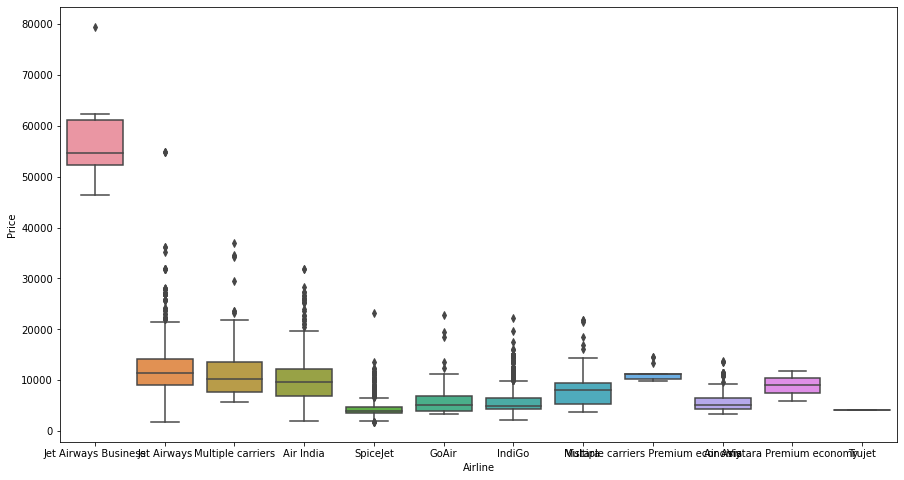

In [26]:
# import the Seaborn Packages and Ploting the Airline with Price Attribute
import seaborn as sns
plt.figure(figsize=(15,8))
sns.boxplot(x='Airline',y='Price',data=df.sort_values('Price',ascending=False))

<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

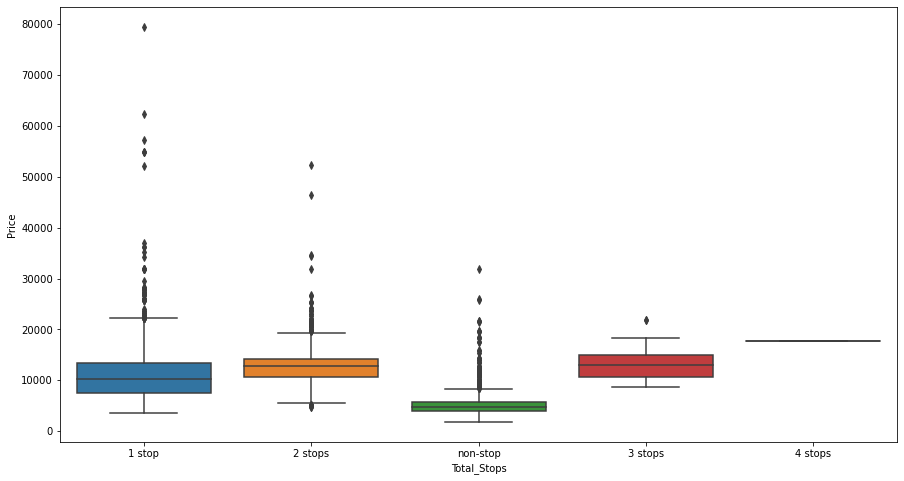

In [27]:
# Ploting the Total_Stops with Price Attribute
plt.figure(figsize=(15,8))
sns.boxplot(x='Total_Stops',y='Price',data=df.sort_values('Price',ascending=False))

In [28]:
# Using the One-Hot Encoding the Airline Datatypes
Airline=pd.get_dummies(categorical['Airline'],drop_first=True)
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,1,0,0,0


In [29]:
# Categories in Source Attribute
categorical['Source'].value_counts()

Delhi       4508
Kolkata     2850
Banglore    2183
Mumbai       693
Chennai      379
Name: Source, dtype: int64

<Figure size 1080x1080 with 0 Axes>

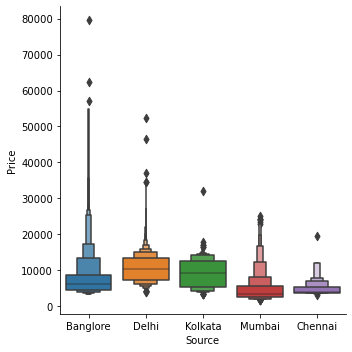

In [30]:
# Ploting the Source with Price Attribute
plt.figure(figsize=(15,15))
sns.catplot(x='Source',y='Price',data=df.sort_values('Price',ascending=False),kind='boxen')

<Figure size 1080x1080 with 0 Axes>

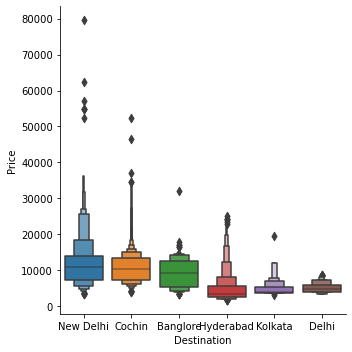

In [31]:
# Categories in Destination Attribute
plt.figure(figsize=(15,15))
sns.catplot(x='Destination',y='Price',data=df.sort_values('Price',ascending=False),kind='boxen')

In [32]:
# Using the One-Hot Encoding the Source Datatypes
source=pd.get_dummies(categorical['Source'],drop_first=True)
source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
4,0,0,0,0
5,0,0,1,0


In [33]:
# Categories in Destination Attribute
categorical['Destination'].value_counts()

Cochin       4508
Banglore     2850
Delhi        1256
New Delhi     927
Hyderabad     693
Kolkata       379
Name: Destination, dtype: int64

<AxesSubplot:xlabel='Destination', ylabel='Price'>

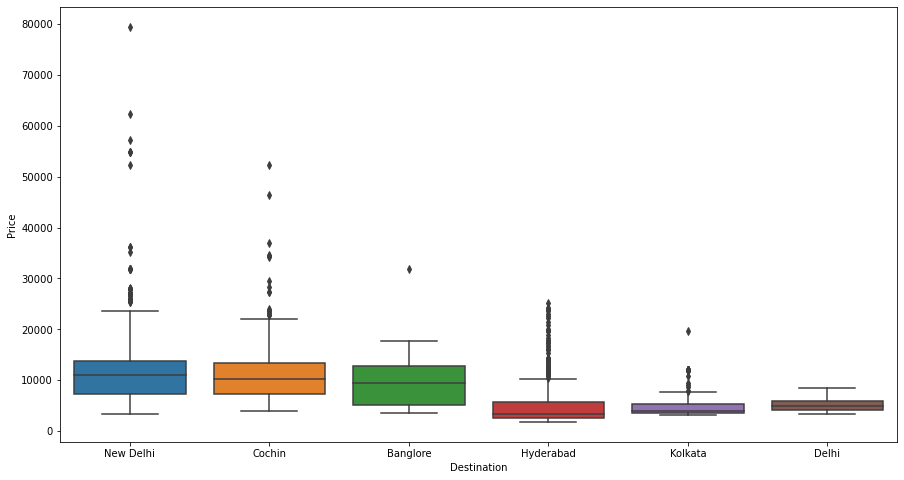

In [34]:
# Ploting the Destination with Price Attribute
plt.figure(figsize=(15,8))
sns.boxplot(x='Destination',y='Price',data=df.sort_values('Price',ascending=False))

In [35]:
# Using the One-Hot Encoding the Destination Datatypes
destination=pd.get_dummies(categorical['Destination'],drop_first=True)
destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
4,0,0,0,0,1
5,0,0,0,0,0


In [36]:
# Displaying the Categories in Categorial Attribute
for i in categorical.columns:
    print('{} has total {} categories'.format(i,len(categorical[i].value_counts())))

Airline has total 12 categories
Source has total 5 categories
Destination has total 6 categories
Total_Stops has total 5 categories


<AxesSubplot:xlabel='Arrival_Time_hour', ylabel='Price'>

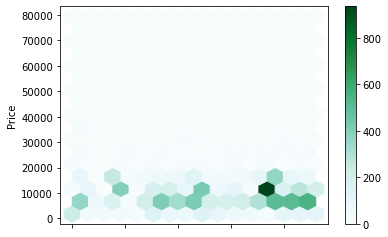

In [37]:
# Ploting the arrival_time_hour with price attribute
df.plot.hexbin(x='Arrival_Time_hour',y='Price',gridsize=15)

In [38]:
# Categories in Total_Stops Attribute
categorical['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [39]:
# Concatinating the all Categorical variable
data=pd.concat([categorical,Airline,source,destination,df[continuous_col]],axis=1)
data.head()

,Airline,Source,Destination,Total_Stops,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,...,New Delhi,Price,journey_date,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,dur_hour,dur_min
0,IndiGo,Banglore,New Delhi,non-stop,0,0,1,0,0,0,...,1,3897.0,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,1,0,0,0,0,0,...,0,7662.0,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,0,0,0,1,0,0,...,0,13882.0,6,9,9,25,4,25,19,0
4,IndiGo,Banglore,New Delhi,1 stop,0,0,1,0,0,0,...,1,13302.0,3,1,16,50,21,35,4,45
5,SpiceJet,Kolkata,Banglore,non-stop,0,0,0,0,0,0,...,0,3873.0,24,6,9,0,11,25,2,25


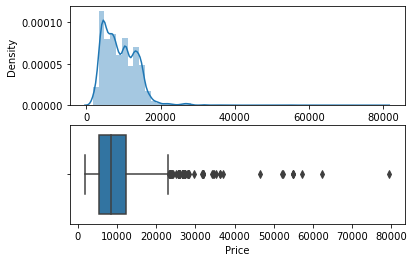

In [40]:
# Identifying the outlier
def plot(data,col):
    fig,(ax1,ax2)=plt.subplots(2,1)
    sns.distplot(data[col],ax=ax1)
    sns.boxplot(data[col],ax=ax2)
plot(data,'Price')

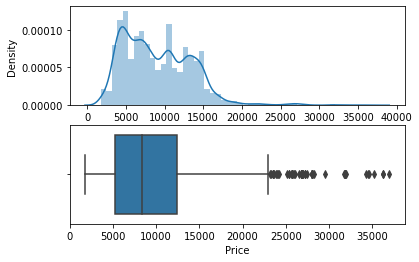

In [41]:
# Resolving the outliers
data['Price']=np.where(data['Price']>=40000,data['Price'].median(),data['Price'])
plot(data,'Price')

In [42]:
# encoding Total stops
dict={'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}
categorical['Total_Stops']=categorical['Total_Stops'].map(dict)

In [43]:
# changing the Categorical to numerical datatypes using label encoding
categorical['Total_Stops']

0        0
1        2
2        2
4        1
5        0
        ..
10678    0
10679    0
10680    0
10681    0
10682    2
Name: Total_Stops, Length: 10613, dtype: int64

In [44]:
# droping the Categorical Variable attribute
drop_col(categorical,'Source')
drop_col(categorical,'Destination')
drop_col(categorical,'Airline')

In [46]:
data=pd.concat([categorical,Airline,source,destination,df[continuous_col]],axis=1)
data.head()

,Total_Stops,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,...,New Delhi,Price,journey_date,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,dur_hour,dur_min
0,0,0,0,1,0,0,0,0,0,0,...,1,3897.0,24,3,22,20,1,10,2,50
1,2,1,0,0,0,0,0,0,0,0,...,0,7662.0,5,1,5,50,13,15,7,25
2,2,0,0,0,1,0,0,0,0,0,...,0,13882.0,6,9,9,25,4,25,19,0
4,1,0,0,1,0,0,0,0,0,0,...,1,13302.0,3,1,16,50,21,35,4,45
5,0,0,0,0,0,0,0,0,1,0,...,0,3873.0,24,6,9,0,11,25,2,25


In [47]:
# Displaying the all Columns 
pd.set_option('display.max_columns',33)
data.head()

,Total_Stops,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Price,journey_date,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,dur_hour,dur_min
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3897.0,24,3,22,20,1,10,2,50
1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,7662.0,5,1,5,50,13,15,7,25
2,2,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,13882.0,6,9,9,25,4,25,19,0
4,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,13302.0,3,1,16,50,21,35,4,45
5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,3873.0,24,6,9,0,11,25,2,25


In [48]:
# assigning the X and Y values
X=data.drop('Price',axis=1)
y=df['Price']

In [49]:
# importing the mutual_information from sklearn packages
# Mutual information (MI) [1] between two random variables is a non-negative value, 
# which measures the dependency between the variables. It is equal to zero 
# if and only if two random variables are independent, and higher values mean higher dependency.


from sklearn.feature_selection import mutual_info_classif
mutual_info_classif(X,y)

array([2.14042017e+00, 7.66258120e-01, 9.81967979e-02, 6.85897644e-01,
       9.16051594e-01, 1.65473964e-03, 5.72536361e-01, 4.45075759e-04,
       3.40775865e-01, 0.00000000e+00, 2.18131437e-01, 0.00000000e+00,
       1.78062978e-01, 1.57122197e+00, 9.00058275e-01, 3.01163836e-01,
       1.56146640e+00, 4.01481635e-01, 2.92075038e-01, 1.73472164e-01,
       3.60168889e-01, 1.06569409e+00, 8.70706388e-01, 1.42476845e+00,
       1.20903853e+00, 1.84171941e+00, 1.52722030e+00, 1.77811505e+00,
       1.11877124e+00])

In [50]:
imp = pd.DataFrame(mutual_info_classif(X,y),index=X.columns)
imp

,0
Total_Stops,2.139549
Air India,0.782585
GoAir,0.101757
IndiGo,0.690884
Jet Airways,0.901529
Jet Airways Business,0.012881
Multiple carriers,0.576976
Multiple carriers Premium economy,0.007205
SpiceJet,0.325362
Trujet,0.000000


In [51]:
imp.columns=['importance']
imp.sort_values(by='importance',ascending=False)

,importance
Total_Stops,2.139549
Arrival_Time_hour,1.825364
dur_hour,1.806094
Delhi,1.556297
Cochin,1.554463
Arrival_Time_min,1.527143
Dep_Time_hour,1.452184
Dep_Time_min,1.215482
journey_date,1.088752
dur_min,1.071206


In [52]:
# importing the train_test from sklearn model selection
# Spliting the test and train data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=123)

In [53]:
# importing the r2_score, mean_absolute_error, mean_squared_error

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
def predict(ml_model):
    print('Model is: {}'.format(ml_model))
    model= ml_model.fit(X_train,y_train)
    print("Training score: {}".format(model.score(X_train,y_train)))
    predictions = model.predict(X_test)
    print("Predictions are: {}".format(predictions))
    print('\n')
    r2score=r2_score(y_test,predictions) 
    print("r2 score is: {}".format(r2score))
          
    print('MAE:{}'.format(mean_absolute_error(y_test,predictions)))
    print('MSE:{}'.format(mean_squared_error(y_test,predictions)))
    print('RMSE:{}'.format(np.sqrt(mean_squared_error(y_test,predictions))))
     
    sns.distplot(y_test-predictions) 

In [54]:
# importing the all types regression

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor

Model is: RandomForestRegressor()
Training score: 0.9511149547753788
Predictions are: [16822.85        5682.755      10532.23       ... 15770.95533333
 16004.89        8387.94      ]


r2 score is: 0.8066796984617071
MAE:1216.8024661076481
MSE:4105795.5006863596
RMSE:2026.2762646505928


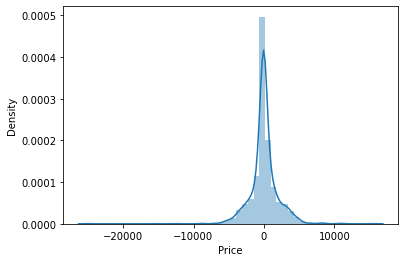

In [55]:
predict(RandomForestRegressor())

Model is: LogisticRegression()
Training score: 0.23345111896348644
Predictions are: [ 5176.  5601. 12102. ...  4082.  7295.  7064.]


r2 score is: 0.15684607426687425
MAE:2537.584079133302
MSE:17907160.122939236
RMSE:4231.685258019462


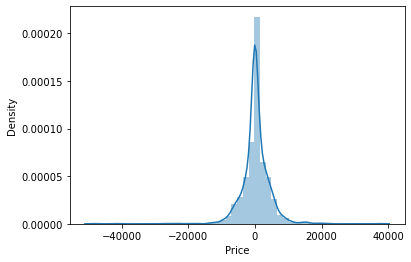

In [56]:
predict(LogisticRegression())

Model is: KNeighborsRegressor()
Training score: 0.7282959472943797
Predictions are: [ 5634.   5729.2 11177.  ... 12811.6  7514.4 14277. ]


r2 score is: 0.5504498892804601
MAE:1983.766556759303
MSE:9547682.3036081
RMSE:3089.9324108478654


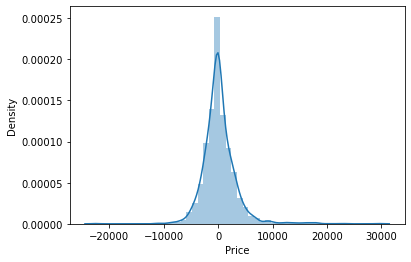

In [57]:
predict(KNeighborsRegressor())

Model is: DecisionTreeRegressor()
Training score: 0.9704555888812059
Predictions are: [13999.   6015.  10361.  ... 14173.5 21730.   8505. ]


r2 score is: 0.6870176545970912
MAE:1376.487666823677
MSE:6647214.4690659195
RMSE:2578.219243793266


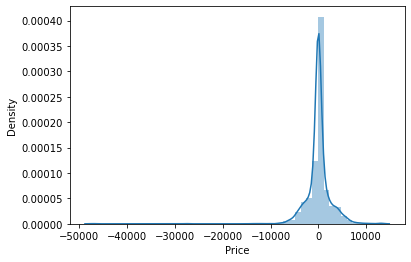

In [58]:
predict(DecisionTreeRegressor())

Model is: SVR()
Training score: 0.004628669035080413
Predictions are: [8071.00515898 8053.45769318 8499.60314614 ... 8277.6688812  8061.30423271
 8341.14093493]


r2 score is: -0.028334379892372752
MAE:3641.496767963967
MSE:21840079.063433904
RMSE:4673.337037218042


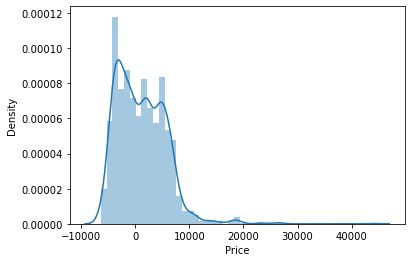

In [59]:
from sklearn.svm import SVR
predict(SVR())

Model is: GradientBoostingRegressor()
Training score: 0.7874628356205996
Predictions are: [11879.77370568  4577.98679055 11577.24366923 ... 16911.95712014
 16483.55109763  7626.7468659 ]


r2 score is: 0.779905062174256
MAE:1547.6021570558735
MSE:4674443.388811835
RMSE:2162.0461116294064


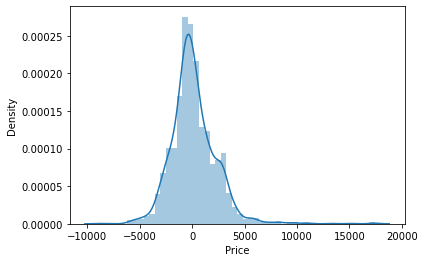

In [60]:
predict(GradientBoostingRegressor())